# chapter3

In [36]:
import numpy as np
import random
import pandas as pd
import scipy.stats

import matplotlib as plt
import matplotlib.pyplot as plt
plt.rcdefaults()
import matplotlib as mpl
mpl.rc("figure", facecolor="white")
plt.rc('axes', axisbelow=True)

# setup

In [43]:
# we want to sample from the posterior distribution a zillion times

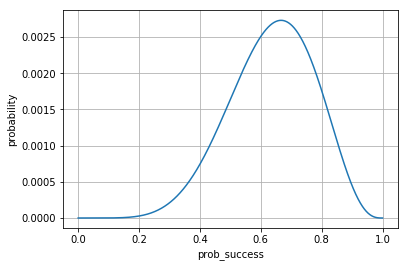

In [85]:
prob_grid = np.arange(0, 1+1e-5, 1/1000)
prior = [1]*prob_grid.shape[0]
likelihood = scipy.stats.binom.pmf(6 , 9, prob_grid)
posterior = likelihood*prior
poster_dist = posterior / posterior.sum()

plt.figure(figsize=(6,4))
plt.plot(prob_grid, poster_dist)
plt.xlabel('prob_success')
plt.ylabel('probability')
plt.grid()
plt.show()

# 3E1

In [99]:
# how much of the posterior prob < 0.2
num = 10000

samples = np.random.choice(prob_grid, size=num, p=poster_dist)
samples[samples < 0.2].shape[0]/num

0.0012

In [100]:
samples

array([0.758, 0.568, 0.489, ..., 0.713, 0.587, 0.709])

# 3E2

In [101]:
# how much of posterior prob lies above 0.8
samples[samples > 0.8].shape[0]/num

0.1201

# 3E3

In [102]:
# how much > 0.2 and < 0.8
samples[ (samples < 0.8) & (samples > 0.2) ].shape[0]/num

0.8775

# 3E4

In [105]:
# 20% of the posterior prob lies below which value of p?
sum_ = 0
for i, j in zip(prob_grid, poster_dist):
    sum_ += j
    if sum_ < 0.2:
        continue
    else:
        print(i)
        break

0.516


# 3E5

In [108]:
# 20% of the posterior prob lies above which value of p?
sum_ = 0
for i, j in zip(prob_grid, poster_dist):
    sum_ += j
    if sum_ < 0.8:
        continue
    else:
        print(i)
        break

0.761


# 3E6

In [226]:
starts = []; ends = []
for index, value in enumerate(poster_dist[:-1]):    
    poster_ = poster_dist[index:]
    
    sums_ = 0
    for i in poster_:
        if i == poster_[-1] and sums_ < 0.66:
            ends.append('none')
            break
            
        elif sums_ < 0.66:
            sums_ += i
            continue

        else:
            ends.append(i)
            break
            
            
    

In [227]:
poster_dist.shape

(1001,)

In [228]:
starts_ends['interval'] = starts_ends['ends'] - starts_ends['starts']

In [229]:
min_ = starts_ends[starts_ends['interval'] == starts_ends['interval'].min()]
min_

,starts,ends,interval
584,0.002399,4.81083e-05,-0.00235093


# 3M1

Text(0, 0.5, 'prob')

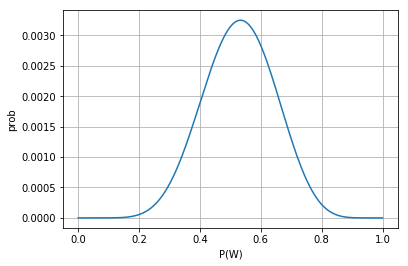

In [263]:
# 8W in 15tosses, construt posterior distribution
prob_grid = np.arange(0, 1.0 + 1e-5, 1/1000)
prior = [1]*prob_grid.shape[0]
likelihood = scipy.stats.binom.pmf(8, 15, prob_grid)
posterior = likelihood*prior
posterior_dist = posterior/posterior.sum()

plt.grid()
plt.plot(prob_grid, posterior_dist)
plt.xlabel('P(W)')
plt.ylabel('prob')

# 3M2

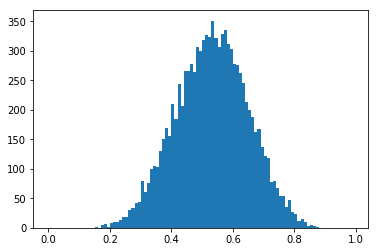

In [264]:
# draw 10,000 samples then calculate 90% HDPI
# HDPI == highest posterior density interval
# == narrowest interval containing the specified prob mass

num=10000
samples = np.random.choice(prob_grid, size=num, p=posterior_dist)

plt.hist(samples, bins=np.arange(0, 1, 1/100))
plt.show()

In [284]:
sample_df = pd.DataFrame({'prob':samples})
unique_samples = sample_df['prob'].unique()

count = []
for i in unique_samples:
    count.append(sample_df[sample_df['prob'] == i].shape[0])
    
count_df = pd.DataFrame({'prob':unique_samples, 'num':count}).sort_values(by='prob', ascending=True).reset_index(drop=True)
count_df['posterior'] = count_df['num']/count_df['num'].sum()
count_df.head()

,prob,num,posterior
0,0.153,1,0.0001
1,0.170,1,0.0001
2,0.171,2,0.0002
3,0.173,1,0.0001
4,0.180,1,0.0001


In [300]:
interval = 1
hdpi = 0.9
start = 0; stop = 0

for index in range(count_df.shape[0] - 1):
    
    count_df_ = count_df.iloc[index:, :]
    starting_prob = count_df_['prob'].values[0]
    
    sum_ = 0
    for i, j in zip(count_df_['posterior'], count_df_['prob']):
        sum_ += i
        if sum_ < hdpi:
            continue
        else:
            interval_ = j - starting_prob
            if interval_ < interval:
                interval = interval_
                start = starting_prob
                stop = j
            break

In [307]:
print(start, stop)

0.332 0.718


# 3M3

In [312]:
# posterior predictive check.  simulate the distribution of samples and average over uncertainty in p.  
count_df.head()

,prob,num,posterior
0,0.153,1,0.0001
1,0.170,1,0.0001
2,0.171,2,0.0002
3,0.173,1,0.0001
4,0.180,1,0.0001


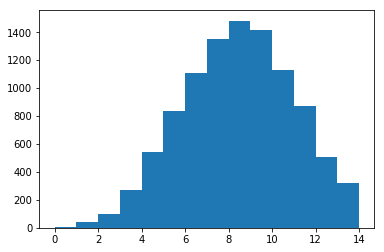

In [380]:
num = 15

rsample = np.random.binomial(num, samples)

plt.hist(np.random.binomial(num, samples), bins=np.arange(0, 15, 1))
plt.show()

In [386]:
# what prob of 8/15?
rsample[rsample == 8].shape[0]/ rsample.shape[0]

0.1413

# 3M4

In [397]:
(np.random.binomial(9, samples) == 6).mean()

0.1719

# 3M5

Text(0, 0.5, 'prob')

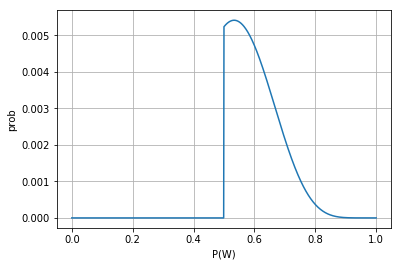

In [400]:
# 8W in 15tosses, construt posterior distribution
prob_grid = np.arange(0, 1.0 + 1e-5, 1/1000)
prior = [0 if i < 0.5 else 1 for i in prob_grid]
likelihood = scipy.stats.binom.pmf(8, 15, prob_grid)
posterior = likelihood*prior
posterior_dist = posterior/posterior.sum()

plt.grid()
plt.plot(prob_grid, posterior_dist)
plt.xlabel('P(W)')
plt.ylabel('prob')

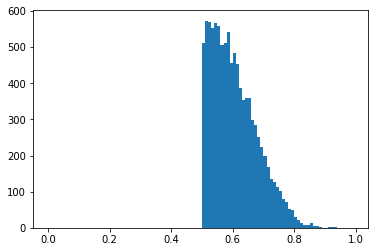

In [401]:
# draw 10,000 samples then calculate 90% HDPI
# HDPI == highest posterior density interval
# == narrowest interval containing the specified prob mass

num=10000
samples = np.random.choice(prob_grid, size=num, p=posterior_dist)

plt.hist(samples, bins=np.arange(0, 1, 1/100))
plt.show()

# 3H1

In [437]:
# load the data
with open('births.txt') as f:
    data = f.readlines()
    
birth1 = data[:2]
birth1 = [i.replace('\n', '') for i in birth1]
birth1 = [i.replace(' ', '') for i in birth1]
birth1 = birth1[0] + birth1[1]
birth1 = [int(i) for i in birth1]


birth2 = data[-2:]
birth2 = [i.replace('\n', '') for i in birth2]
birth2 = [i.replace(' ', '') for i in birth2]
birth2 = birth2[0] + birth2[1]
birth2 = [int(i) for i in birth2]

In [445]:
# MALE = 1, FEMALE = 0
# Each pair represents first and second born child in two child families
total_boys = sum(birth1) + sum(birth2)
total_kids = len(birth1) + len(birth2)
print(total_boys, total_kids, total_boys/total_kids)

111 200 0.555


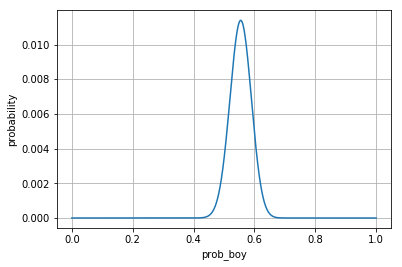

In [444]:
# using grid approx, compute post dist for prob of birth being a boy
# uniform prob
# what param maximizes the prob?
prob_grid = np.arange(0, 1.0 + 1e-5, 1/1000)
prior = [1]*prob_grid.shape[0]

likelihood = scipy.stats.binom.pmf(total_boys , total_kids, prob_grid)
posterior = likelihood*prior
poster_dist = posterior / posterior.sum()

plt.figure(figsize=(6,4))
plt.plot(prob_grid, poster_dist)
plt.xlabel('prob_boy')
plt.ylabel('probability')
plt.grid()
plt.show()

In [451]:
max_ = poster_dist.max()
for i, j in zip(prob_grid, poster_dist):
    if j == max_:
        print(i)

0.555


# 3H2

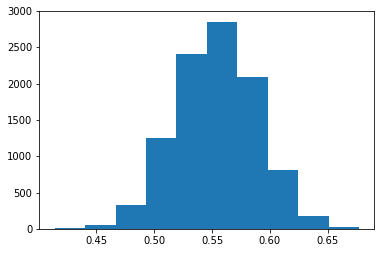

In [480]:
# sample 10,000 random parameter values from posteriro dist, estimage 50% HPDI
samples = np.random.choice(prob_grid, size=10000, p=poster_dist)
plt.hist(samples)
plt.show()

In [481]:
posterior = pd.DataFrame({'prob':samples})

probs = posterior['prob'].unique()
counts = [posterior[posterior['prob'] == i].shape[0] for i in probs]
post_pd = pd.DataFrame({'prob':posterior['prob'].unique(), 
                        'count':counts})

post_pd = post_pd.sort_values(by='prob').reset_index(drop=True)
post_pd['posterior'] = post_pd['count'] / post_pd['count'].sum()
post_pd.head()

,prob,count,posterior
0,0.414,1,0.0001
1,0.416,1,0.0001
2,0.417,1,0.0001
3,0.433,1,0.0001
4,0.435,1,0.0001


In [482]:
interval = 1
hdpi = 0.5
start = 0; stop = 0

for index in range(post_pd.shape[0] - 1):
    
    count_df_ = post_pd.iloc[index:, :]
    starting_prob = count_df_['prob'].values[0]
    
    sum_ = 0
    for i, j in zip(count_df_['posterior'], count_df_['prob']):
        sum_ += i
        if sum_ < hdpi:
            continue
        else:
            interval_ = j - starting_prob
            if interval_ < interval:
                interval = interval_
                start = starting_prob
                stop = j
            break
            
print(start, stop)

0.53 0.577


# 3H3

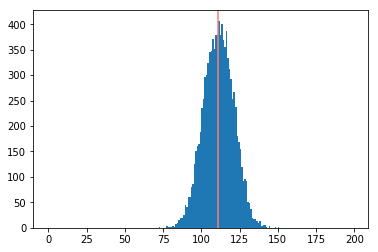

In [510]:
# simulate 10,000 replicates of 200 births
sims = np.random.binomial(200, samples)
plt.hist(sims, bins=np.arange(0, 200, 1))
plt.axvline(total_boys, color='salmon')
plt.show()

In [511]:
sims.mean()

110.7378

In [512]:
# perfectly matches birth1 + birth2

# 3H4

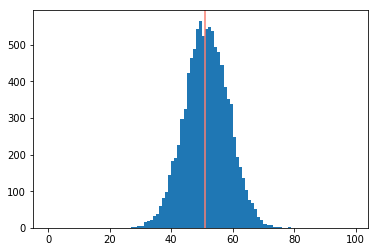

In [520]:
# compare 10,000 counts of boys from 100 simulated first borns to the numberof boys in the first births1
prob_grid = np.arange(0, 1.0 + 1e-5, 1/1000)
prior = [1]*prob_grid.shape[0]

likelihood = scipy.stats.binom.pmf(sum(birth1) , len(birth1), prob_grid)
posterior = likelihood*prior
poster_dist = posterior / posterior.sum()

samples = np.random.choice(prob_grid, size=10000, p=poster_dist)

boys = np.random.binomial(100, samples)

plt.hist(boys, bins=np.arange(0, 100, 1))
plt.axvline(sum(birth1), color='salmon')
plt.show()


In [521]:
# compare to real data

# 3H5

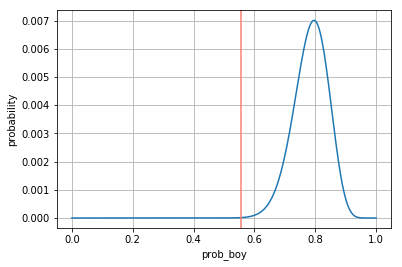

In [533]:
# model assumes that P(boy | girl) = P(boy)
# check this assumption

p_boy = total_boys/total_kids

# count the number of female first births
# count the number of males we get after a female birth
female_b1 = len(birth1)- sum(birth1)
male2_female1 = sum([1 for i, j in zip(birth1, birth2) if i == 0 and j == 1])

# if it is indepentent we expect P(G | B) = P(B)
likelihood = scipy.stats.binom.pmf(male2_female1 , female_b1, prob_grid)
posterior = likelihood*prior
poster_dist = posterior / posterior.sum()

plt.figure(figsize=(6,4))
plt.plot(prob_grid, poster_dist)

plt.axvline(p_boy, color='salmon')


plt.xlabel('prob_boy')
plt.ylabel('probability')
plt.grid()
plt.show()

In [532]:
male2_female1/female_b1

0.7959183673469388

In [534]:
male2_female1

39

In [535]:
female_b1

49